In [1]:
import os
os.getcwd()

'/Users/nickkon/projects/pet/ITEA/Lection_2'

In [3]:
import pandas as pd

In [16]:
df = pd.read_csv("../data/gm_2008_region.csv", encoding='utf-8')

In [6]:
!ls ../data

gm_2008_region.csv


In [17]:
df.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [11]:
!ls -l ../data/gm_2008_region.csv

-rw-r--r--  1 nickkon  staff  12750 Aug 17 16:31 ../data/gm_2008_region.csv


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 11.0+ KB


In [14]:
df.describe()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
count,1.390000e+02,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000,139.000000
mean,3.549977e+07,3.005108,1.915612,4.459874,24.623054,16638.784173,126.701914,69.602878,45.097122
std,1.095121e+08,1.615354,4.408974,6.268349,2.209368,19207.299083,4.471997,9.122189,45.724667
min,2.773150e+05,1.280000,0.060000,0.008618,20.397420,588.000000,117.375500,45.200000,2.700000
25%,3.752776e+06,1.810000,0.100000,0.496190,22.448135,2899.000000,123.232200,62.200000,8.100000
50%,9.705130e+06,2.410000,0.400000,2.223796,25.156990,9938.000000,126.519600,72.000000,24.000000
75%,2.791973e+07,4.095000,1.300000,6.589156,26.497575,23278.500000,130.275900,76.850000,74.200000
max,1.197070e+09,7.590000,25.900000,48.702062,28.456980,126076.000000,135.492000,82.600000,192.000000


In [21]:
type(df)

pandas.core.frame.DataFrame

In [19]:
import matplotlib.pyplot as plt

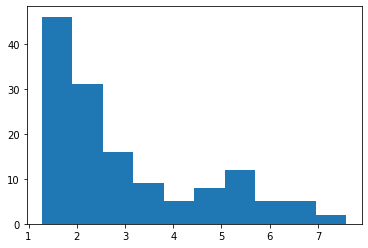

In [25]:
plt.hist(df['fertility']);
plt.show()

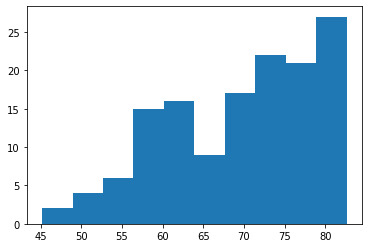

In [24]:
plt.hist(df['life']);

In [28]:
df.corr()['life']

population        -0.005051
fertility         -0.786921
HIV               -0.604749
CO2                0.476666
BMI_male           0.731559
GDP                0.628999
BMI_female        -0.658718
life               1.000000
child_mortality   -0.874106
Name: life, dtype: float64

In [27]:
import seaborn as sns

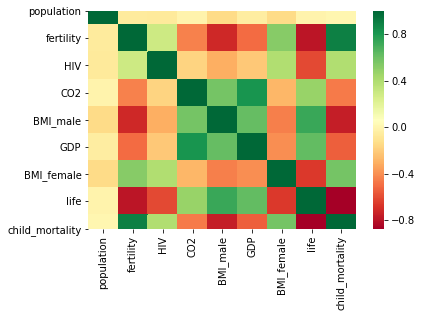

In [34]:
sns.heatmap(df.corr(), cmap='RdYlGn');

### Train the model

In [35]:
y = df['life']

In [61]:
X = df.drop(columns=['life', 'Region'])

In [60]:
X.columns

Index(['population', 'fertility', 'HIV', 'CO2', 'BMI_male', 'GDP',
       'BMI_female', 'child_mortality', 'Region'],
      dtype='object')

In [70]:
from sklearn.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

In [73]:
X_train.shape

(111, 8)

In [74]:
X_test.shape

(28, 8)

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
lr = LinearRegression()

In [62]:
type(lr)

sklearn.linear_model.base.LinearRegression

In [76]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
y_pred = lr.predict(X_test)

In [78]:
y_pred.shape

(28,)

In [66]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [79]:
mean_absolute_error(y_test, y_pred)

2.8951597999142673

In [80]:
mean_squared_error(y_test, y_pred)

13.89628663556724

In [81]:
r2_score(y_test, y_pred)

0.792919158760469